# Medical Cost Personal Datasets ( Variant 4)

Name: Meshalkin Artur <br>
Student-ID : 586811




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('data/insurance.csv') # read csv data as dataframe
df.head() # first 5 elements

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info() # information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe() # numerical data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.describe(include='object') # categorical data

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [6]:
df[df.duplicated(keep=False)] # check for duplicates

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df.drop_duplicates(inplace=True) # remove duplicates
df.shape

(1337, 7)

In [8]:
df.reset_index(inplace=True, drop=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.isnull().mean() * 100 # check for null values in percentage

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

# Numerical data


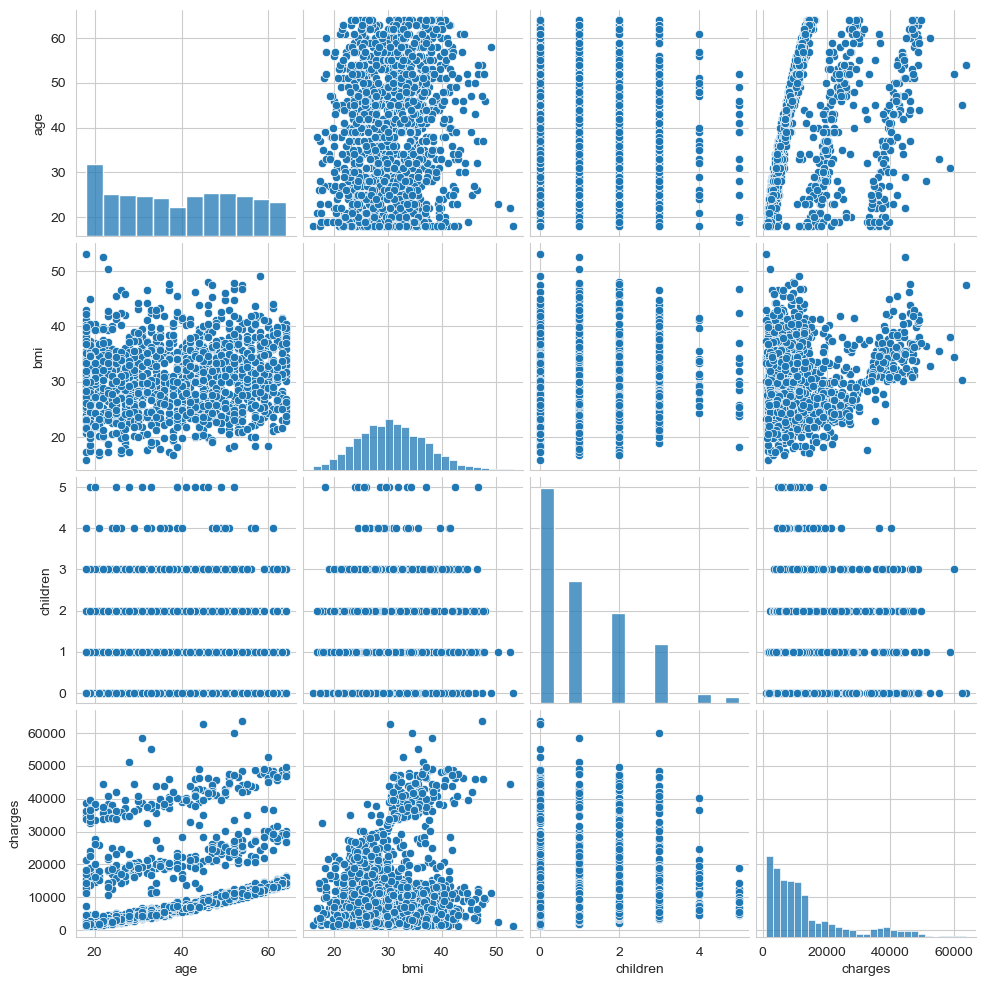

In [10]:
sns.pairplot(df)

/var/folders/lx/p1kcmpm17yj5dk8xtgtjjymh0000gn/T/ipykernel_66885/853678662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

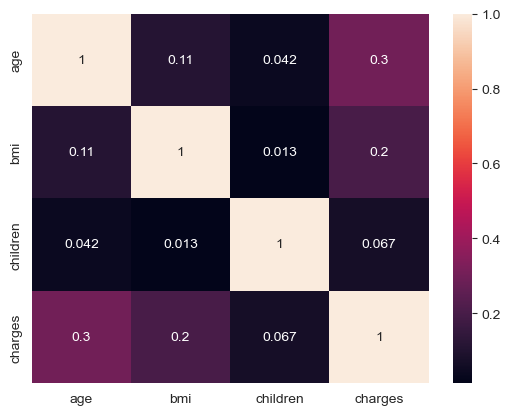

In [11]:
corr = df.corr()
sns.heatmap(corr, annot=True)


# Categorical data

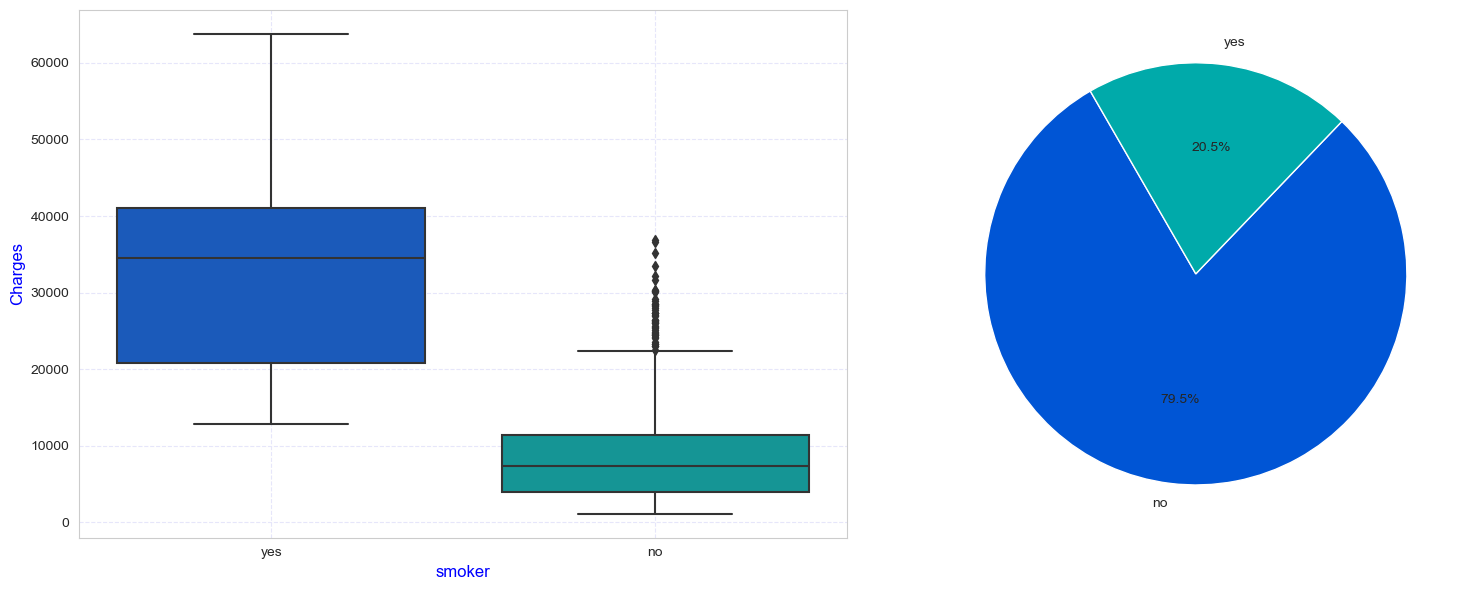

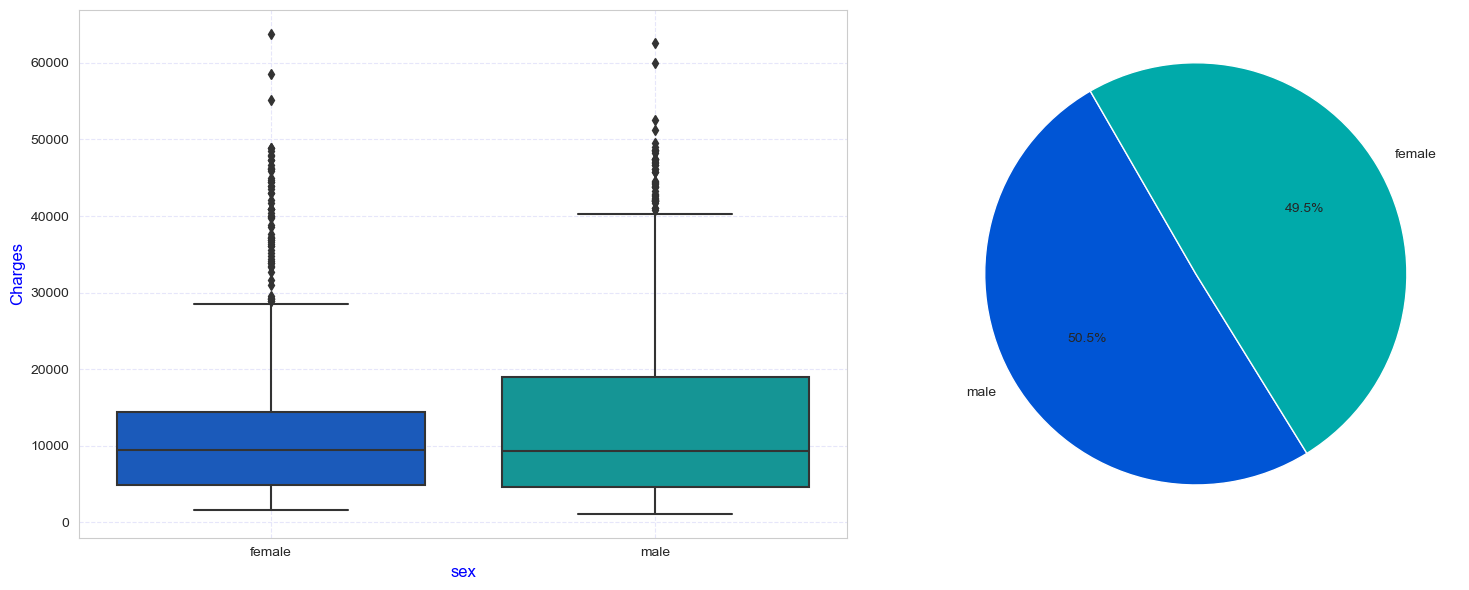

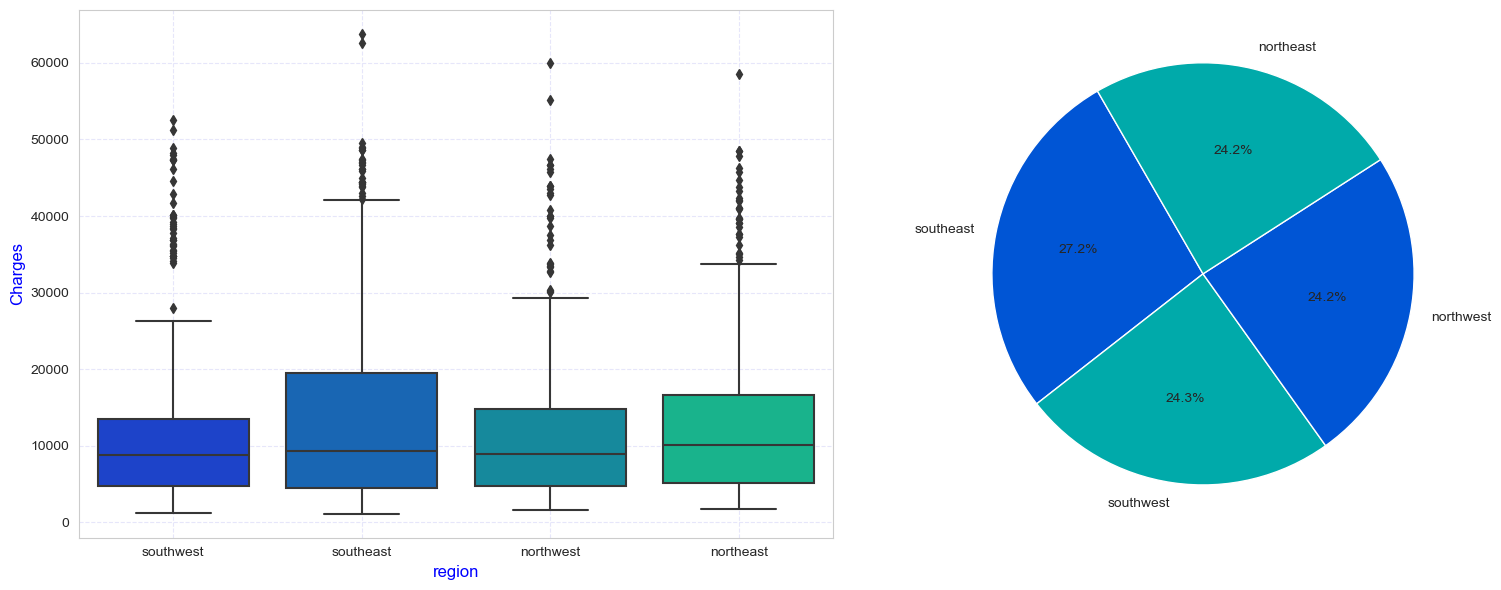

In [12]:
def display_cat(x):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    colors = sns.color_palette("winter", 2)
    sns.boxplot(ax=axes[0], data=df, x=x, y="charges", palette="winter")
    axes[0].set_xlabel(x, fontsize=12, color='blue')
    axes[0].set_ylabel("Charges", fontsize=12, color='blue')
    axes[0].grid(True, linestyle='--', color='lavender')
    smoker_counts = df[x].value_counts()
    axes[1].pie(
        smoker_counts,
        labels=smoker_counts.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=120,
    )
    plt.tight_layout()
    plt.show()


display_cat("smoker")
display_cat("sex")
display_cat("region")

# Target value

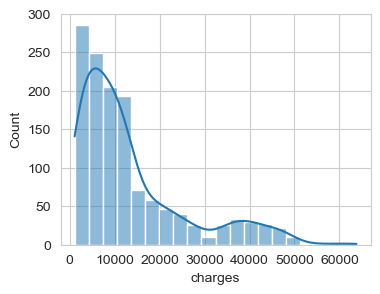

In [13]:
plt.figure(figsize=(4,3))
sns.histplot(df,x="charges",bins=20,kde=True);


# Preprocessing

## StandardScaler

The **StandardScaler** standardizes features by removing the mean and scaling to unit variance.

The formula used is:
$$
z = \frac{x - \mu}{\sigma}
$$
Where:
- $x$ : the original value
- $\mu$: the mean of the feature
- $\sigma$: the standard deviation of the feature
- $z$: the standardized value

This transformation results in a feature with a mean of 0 and a standard deviation of 1s


The **OneHotEncoder** is a method for converting categorical variables into a binary format.
It creates new columns for each category where 1 means the category is present and 0 means it is not <br>
The **OneHotEncoder(drop="first")** transforms categorical variables into binary (0/1) columns, dropping the first category to avoid redundancy.


In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_cols = ["sex", "smoker", "region"]
numeric_cols = ["age", "bmi", "children"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ]
)


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'bmi', 'children']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['sex', 'smoker', 'region'])])


# Linear Regression

Linear Regression is a supervised learning algorithm used to predict a continuous target variable based on the linear relationship between input features (independent variables) and the output (dependent variable).


**Multiple Linear Regression** :

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$

Where:
- $\hat{y}$ : predicted value
- $\beta_0$ : bias
- $\beta_1, \beta_2, \beta_n $ : weights
- $x_1 , x_2, x_n$: features

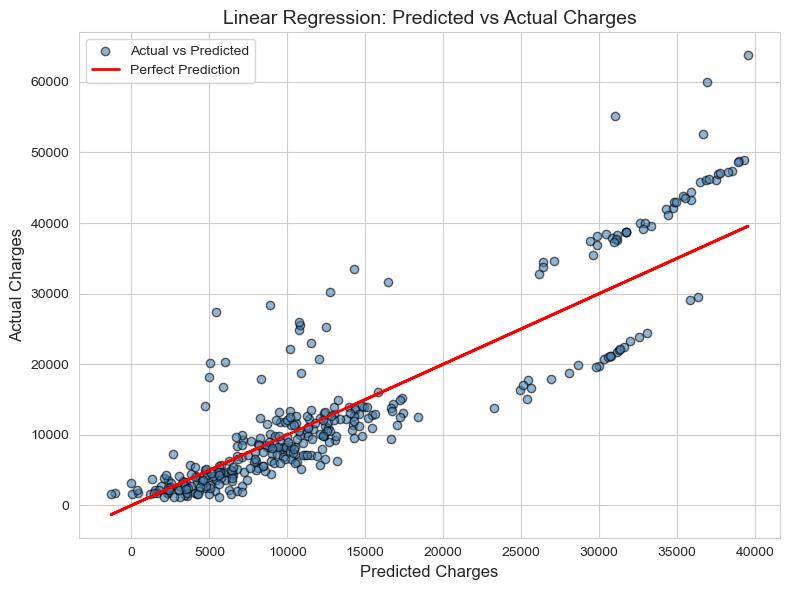

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lin_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", LinearRegression())
])

X = df.drop(['charges'], axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lin_model.fit(X_train, y_train)

y_train_pred = lin_model.predict(X_train)
y_test_pred = lin_model.predict(X_test)


def plot_charges_lin():
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_pred, y_test, alpha=0.6, color='steelblue', edgecolor='black', label='Actual vs Predicted')
    plt.plot(y_test_pred, y_test_pred, color='red', linewidth=2, label='Perfect Prediction')
    plt.xlabel("Predicted Charges", fontsize=12)
    plt.ylabel("Actual Charges", fontsize=12)
    plt.title("Linear Regression: Predicted vs Actual Charges", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_charges_lin()


## Loss Function (for training)
Training linear regression is the minimization of the mean squared error(MSE)


$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


Where:

-  $y_i$: actual value
- $\hat{y}_i$: predicted value
- $n$: number of data points

After training, we often use the same MSE to evaluate how well the model is performing on test data. Alternatively, we can use other metrics.

## Metrics (for evaluation)
### **Root Mean Squared Error (RMSE)**
$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$
- Same units as the target variable
### **Mean Absolute Error (MAE) , Mean Absolute Percentage Error (MAPE)**
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$
- Less sensitive to outliers than MSE
$$
MAPE = \frac{1}{n} \sum_{i=1}^{n} \frac{|y_i - \hat{y}_i|}{y_i}
$$
### **R-squared (Coefficient of Determination)**
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2} {\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
- $\bar{y}$ : the mean of the predicted value
- Indicates proportion of variance explained by the model
- Value ranges from 0 to 1 (higher is better)



In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error



def display_metrics(y_test,y_test_pred,y_train,y_train_pred):
    mse_train = mean_squared_error(y_train,y_train_pred)
    mse = mean_squared_error(y_test,y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse = np.sqrt(mse)

    r2_train = r2_score(y_train, y_train_pred)
    r2 = r2_score(y_test, y_test_pred)

    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mape = mean_absolute_percentage_error(y_test, y_test_pred)

    print(f"Train MSE: {round(mse_train,3)} RMSE: {round(rmse_train,3)}, R²: {round(r2_train,3)}, MAPE: {round(mape_train,3)}")
    print("-" * 100)
    print(f"Test MSE:{round(mse,3)} RMSE: {round(rmse,3)}, R²: {round(r2,3)}, MAPE: {round(mape,3)}")
    print("-" * 100)


display_metrics(y_test,y_test_pred,y_train,y_train_pred)


Train MSE: 37182190.657 RMSE: 6097.72, R²: 0.73, MAPE: 0.424
----------------------------------------------------------------------------------------------------
Test MSE:35283922.771 RMSE: 5940.027, R²: 0.796, MAPE: 0.4
----------------------------------------------------------------------------------------------------


In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_model, X, y, cv=5, scoring='r2')
print(scores.mean())

0.7467384760760104


## Learning Curves
Learning curves help us understand how well our model is learning as you increase the amount of training data.

They typically show two lines:

    Training score – the model's performance  on the training set.

    Test score – the model's performance on the test set.
The shaded area around the learning curves, typically representing the standard deviation (error band).
The smaller the standard deviation, the more stable is the model.


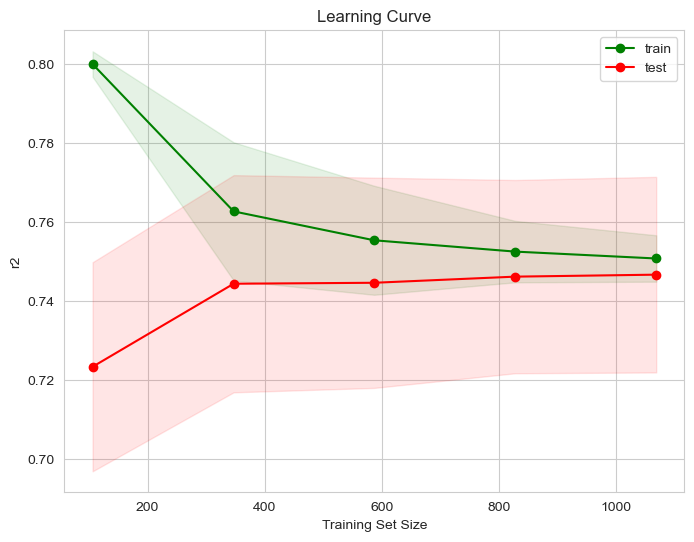

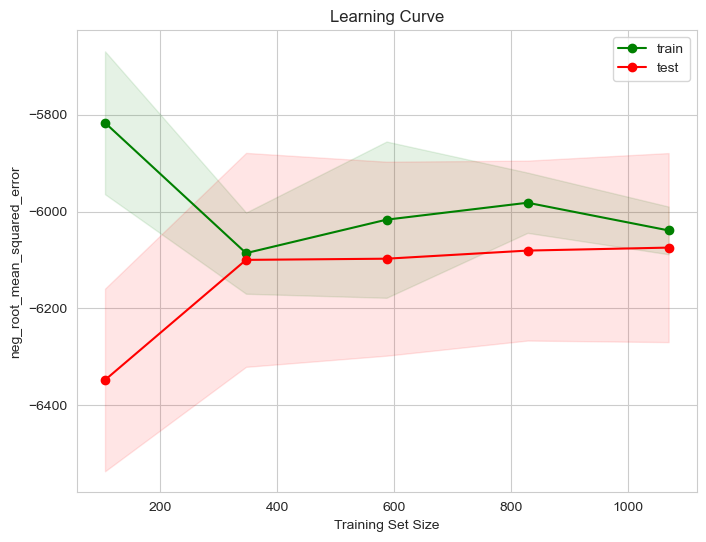

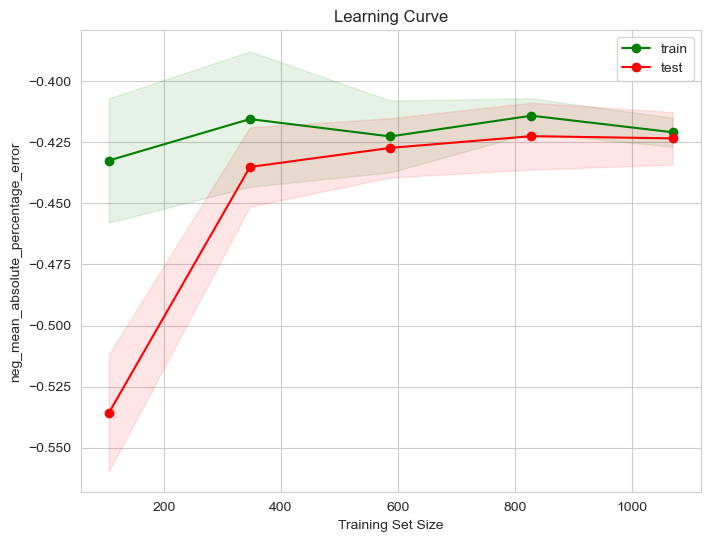

In [18]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(X, y, model,scoring):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_std = test_scores.std(axis=1)
    plt.subplots(figsize=(8, 6))

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="g") # error band train
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="r") # error band test

    plt.plot(train_sizes, train_mean, label="train", marker='o', color='g')
    plt.plot(train_sizes, test_mean, label="test", marker='o', color='r')

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel(scoring)
    plt.legend(loc="best")
    plt.show()


plot_learning_curve(X,y,lin_model,scoring="r2")
plot_learning_curve(X,y,lin_model,scoring="neg_root_mean_squared_error")
plot_learning_curve(X,y,lin_model,scoring="neg_mean_absolute_percentage_error")


# Polynomial Regression

- Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as a polynomial in x
$$
\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_n x^n
$$

**GridSearchCV** is  used to tune hyperparameters .

It performs **cross-validation** for each combination of hyperparameters and returns the combination that gives the best performance.


In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
poly_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("poly_features", PolynomialFeatures(include_bias=False)),
    ("regressor", LinearRegression())
])
param_grid = {
    "poly_features__degree": [1, 2, 3, 4, 5]
}
grid_search = GridSearchCV(poly_model, param_grid=param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

results = grid_search.cv_results_

results_df = pd.DataFrame(results)

results_df[["params", "mean_test_score", "std_test_score", "rank_test_score"]].head()


,params,mean_test_score,std_test_score,rank_test_score
0,{'poly_features__degree': 1},0.724948,0.021149,3
1,{'poly_features__degree': 2},0.808866,0.035924,2
2,{'poly_features__degree': 3},0.811955,0.021997,1
3,{'poly_features__degree': 4},0.671949,0.077287,4
4,{'poly_features__degree': 5},-407.879996,736.569653,5


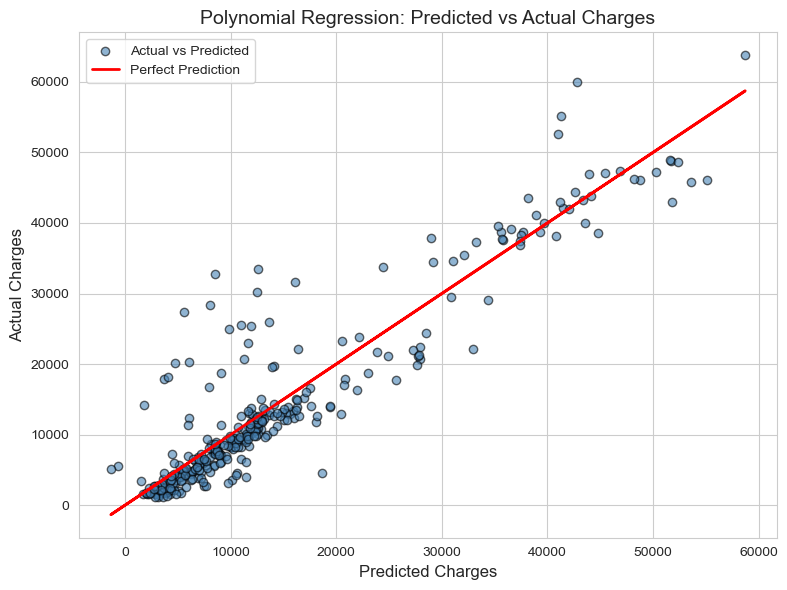

Train MSE: 20705600.698 RMSE: 4550.341, R²: 0.85, MAPE: 0.307
----------------------------------------------------------------------------------------------------
Test MSE:24293362.601 RMSE: 4928.83, R²: 0.86, MAPE: 0.354
----------------------------------------------------------------------------------------------------


In [20]:
from sklearn.preprocessing import PolynomialFeatures


def poly_model_predict(degree,preprocessor):
    poly_model = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("regressor", LinearRegression())
    ])
    poly_model.fit(X_train, y_train)

    y_pred_poly_train = poly_model.predict(X_train)
    y_pred_poly_test = poly_model.predict(X_test)

    return y_pred_poly_train, y_pred_poly_test

y_pred_poly_train, y_pred_poly_test = poly_model_predict(3,preprocessor)


def plot_charges_poly():
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred_poly_test, y_test, alpha=0.6, color='steelblue', edgecolor='black', label='Actual vs Predicted')
    plt.plot(y_pred_poly_test, y_pred_poly_test, color='red', linewidth=2, label='Perfect Prediction')
    plt.xlabel("Predicted Charges", fontsize=12)
    plt.ylabel("Actual Charges", fontsize=12)
    plt.title("Polynomial Regression: Predicted vs Actual Charges", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_charges_poly()

display_metrics(y_test,y_pred_poly_test,y_train,y_pred_poly_train)


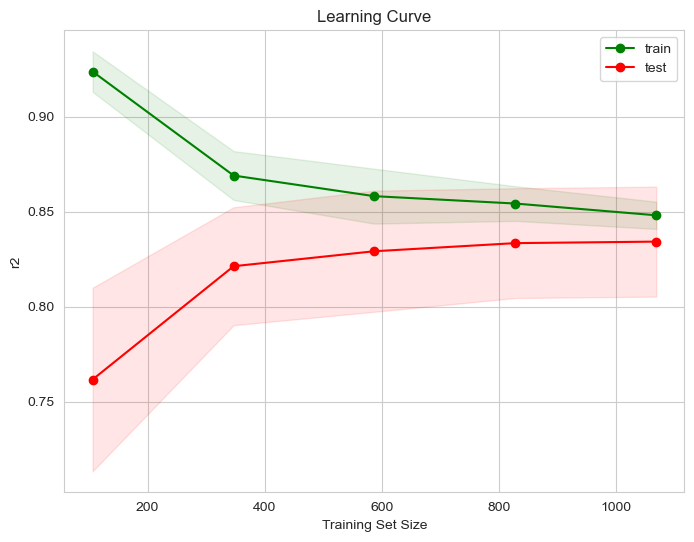

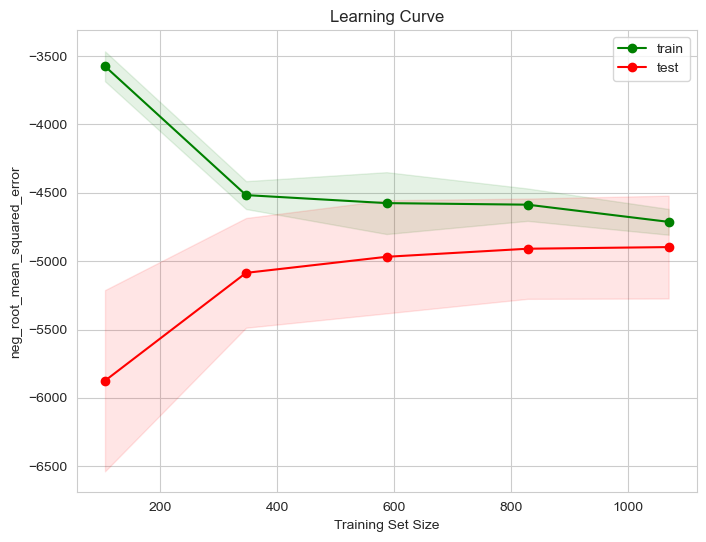

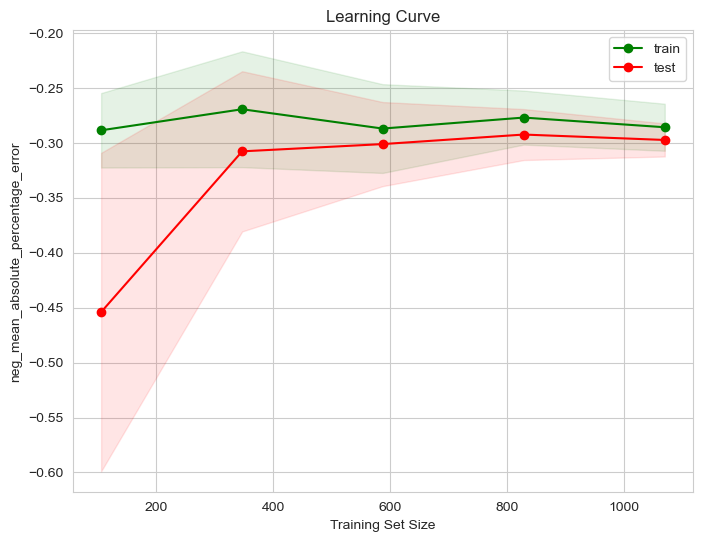

In [21]:
plot_learning_curve(X,y,poly_model,scoring="r2")
plot_learning_curve(X,y,poly_model,scoring="neg_root_mean_squared_error")
plot_learning_curve(X,y,poly_model,scoring="neg_mean_absolute_percentage_error")

# Conclusion
When using linear regression, it is evident that the model is underfitting (the results on the test data are even better than on the training data). When comparing linear regression to polynomial regression of degree 3, we can see that the polynomial model provides results that are closer to the ideal line (in the best case, the points lie along a 45-degree angle). All performance metrics have also significantly improved and the error band in the learning curve  gets smaller.

Train MSE: 37182190.657 RMSE: 6097.72, R²: 0.73, MAPE: 0.424
----------------------------------------------------------------------------------------------------
Test MSE:35283922.771 RMSE: 5940.027, R²: 0.796, MAPE: 0.4
----------------------------------------------------------------------------------------------------


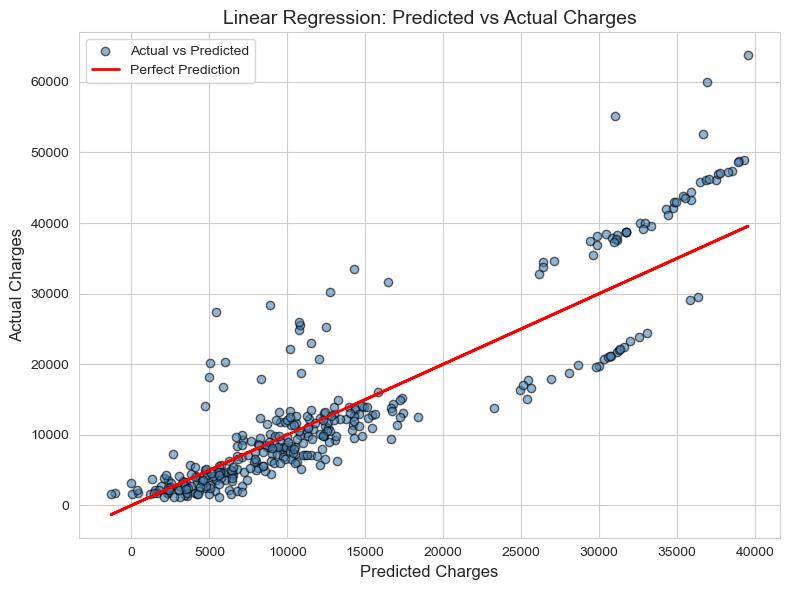

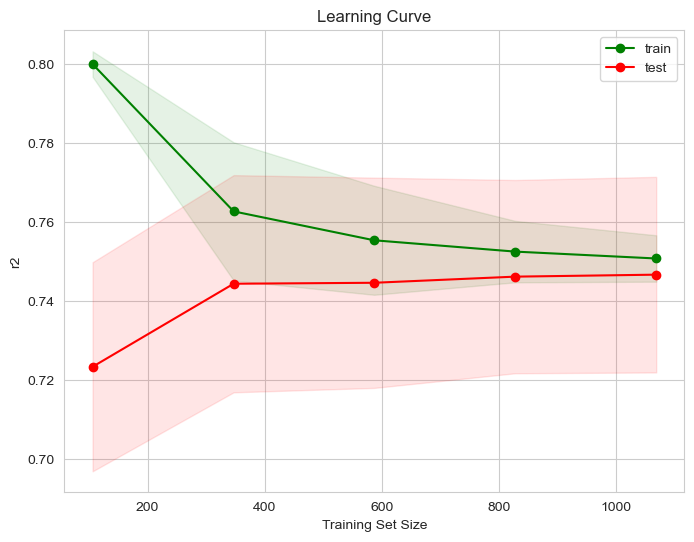

Train MSE: 20705600.698 RMSE: 4550.341, R²: 0.85, MAPE: 0.307
----------------------------------------------------------------------------------------------------
Test MSE:24293362.601 RMSE: 4928.83, R²: 0.86, MAPE: 0.354
----------------------------------------------------------------------------------------------------


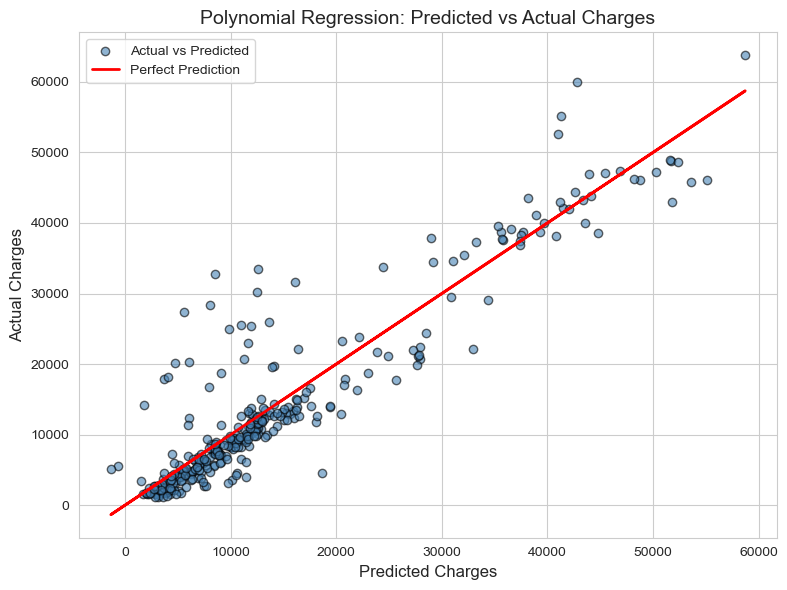

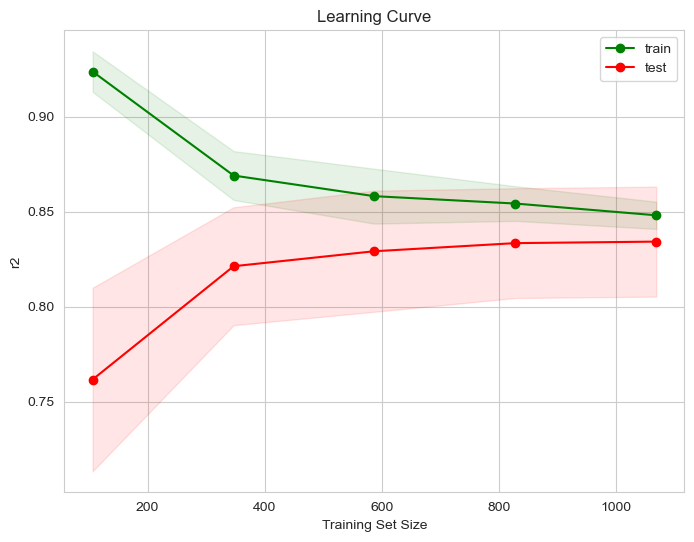

In [22]:
display_metrics(y_test,y_test_pred,y_train,y_train_pred)
plot_charges_lin()
plot_learning_curve(X,y,lin_model,scoring="r2")

display_metrics(y_test,y_pred_poly_test,y_train,y_pred_poly_train)
plot_charges_poly()
plot_learning_curve(X,y,poly_model,scoring="r2")

*
If we use a polynomial of degree 4 or higher, the model starts to overfit.

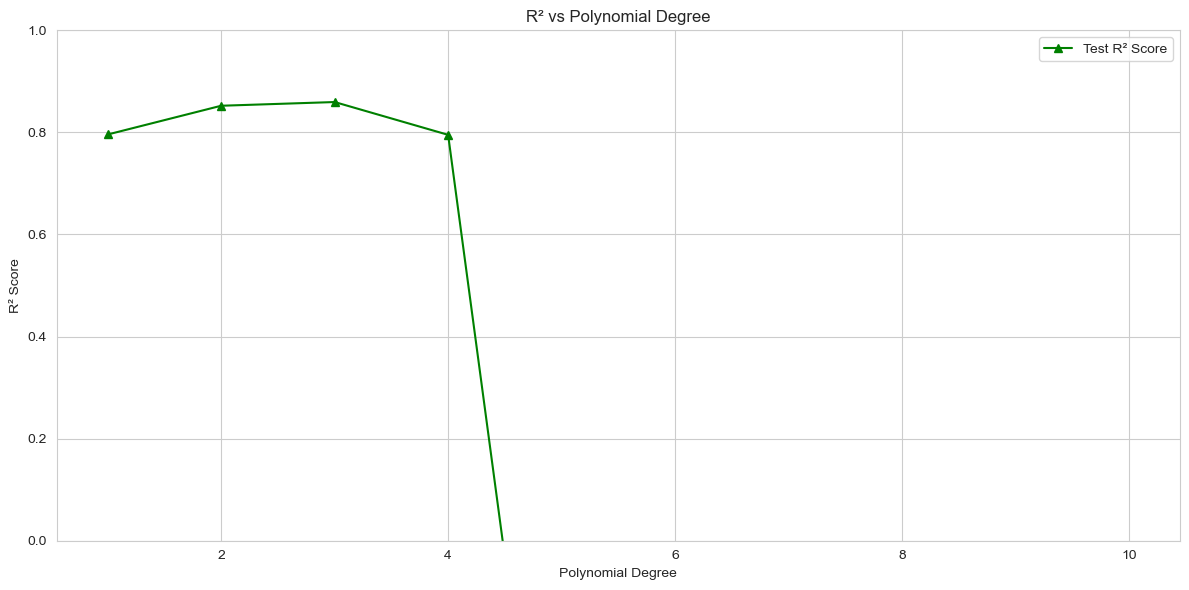

In [23]:
def plot_poly_degree_performance(y_test,preprocessor, max_degree=10):
    r2_scores = []

    degrees = range(1, max_degree + 1)

    for d in degrees:
        y_train_pred , y_test_pred = poly_model_predict(d,preprocessor=preprocessor)

        r2_scores.append(r2_score(y_test, y_test_pred))

    plt.figure(figsize=(12, 6))
    plt.plot(degrees, r2_scores, label='Test R² Score', marker='^', color='green')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('R² Score')
    plt.ylim(0, 1)
    plt.title('R² vs Polynomial Degree')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_poly_degree_performance(y_test,preprocessor=preprocessor)